## 2 - What is the average height of the players?

In [4]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load all team parquet files
home_files = glob('../data/raw/*/home_team_[0-9]*.parquet')
away_files = glob('../data/raw/*/away_team_[0-9]*.parquet')

In [5]:
# Load and clean home player data
df_home = [pd.read_parquet(f, columns=['match_id', 'full_name', 'height', 'gender']) for f in home_files]
df_home_cleaned = [df.dropna(subset=['full_name', 'height', 'gender']) for df in df_home]
df_home_heights = pd.concat([df for df in df_home_cleaned if not df.empty], ignore_index=True)
df_home_heights.head()

,match_id,full_name,height,gender
0,12080595,"Caruso, Salvatore",1.85,M
1,12080174,"Catani, Leonardo",1.91,M
2,12076846,"Dong, Jiayang",1.78,M
3,12078716,"Kovacevic, Aleksandar",1.83,M
4,12076932,"Muller, Alexandre",1.83,M


In [6]:
# Load and clean away player data
df_away = [pd.read_parquet(f, columns=['match_id', 'full_name', 'height', 'gender']) for f in away_files]
df_away_cleaned = [df.dropna(subset=['full_name', 'height', 'gender']) for df in df_away]
df_away_heights = pd.concat([df for df in df_away_cleaned if not df.empty], ignore_index=True)
df_away_heights.head()

,match_id,full_name,height,gender
0,12080893,"Seateun, Nathan",1.80,M
1,12078780,"Kikuchi, Yuta",1.73,M
2,12077807,"Diez, Steven",1.75,M
3,12076723,"Grenier, Hugo",1.96,M
4,12049638,"de Minaur, Alex",1.83,M


In [7]:
# Combine and deduplicate player data
df_all_heights = pd.concat([df_home_heights, df_away_heights], axis=0).drop_duplicates('full_name')
df_all_heights.head()

,match_id,full_name,height,gender
0,12080595,"Caruso, Salvatore",1.85,M
1,12080174,"Catani, Leonardo",1.91,M
2,12076846,"Dong, Jiayang",1.78,M
3,12078716,"Kovacevic, Aleksandar",1.83,M
4,12076932,"Muller, Alexandre",1.83,M


In [8]:
# Ensure height is float and gender is uppercase
df_all_heights['height'] = df_all_heights['height'].astype(float)
df_all_heights['gender'] = df_all_heights['gender'].str.upper()

In [9]:
# Compute statistics
average_all = df_all_heights['height'].mean()
average_male = df_all_heights[df_all_heights['gender'] == 'M']['height'].mean()
average_female = df_all_heights[df_all_heights['gender'] == 'F']['height'].mean()
max_height = df_all_heights['height'].max()
min_height = df_all_heights['height'].min()

# Analysis summary
print("\nHeight Analysis Summary by Gender:")
print("=" * 40)
print(f"Average height (All):   {average_all:.2f} cm")
print(f"Average height (Male):  {average_male:.2f} cm")
print(f"Average height (Female):{average_female:.2f} cm")
print(f"Max height:             {max_height:.2f} cm")
print(f"Min height:             {min_height:.2f} cm")


Height Analysis Summary by Gender:
Average height (All):   1.82 cm
Average height (Male):  1.84 cm
Average height (Female):1.73 cm
Max height:             2.08 cm
Min height:             1.57 cm


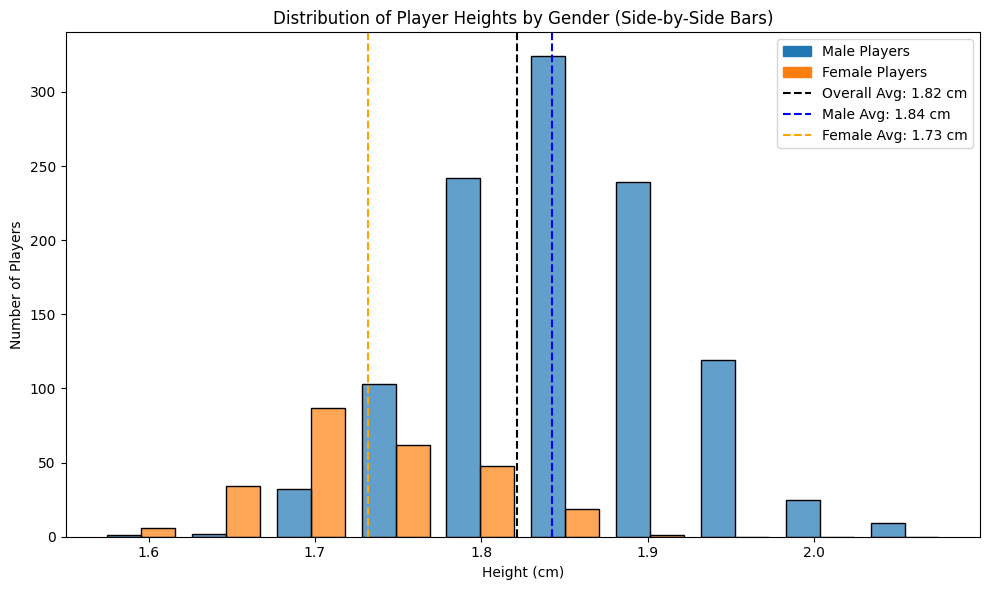

In [11]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_all_heights,
    x='height',
    hue='gender',
    bins=10,
    palette=['#1f77b4', '#ff7f0e'],  # Blue for male, orange for female
    alpha=0.7,
    multiple='dodge',
    stat='count',
    shrink=0.8
)

plt.title('Distribution of Player Heights by Gender (Side-by-Side Bars)')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')

# Draw vertical lines for averages
line_overall = plt.axvline(average_all, color='black', linestyle='--', label=f'Overall Avg: {average_all:.2f} cm')
line_male = plt.axvline(average_male, color='blue', linestyle='--', label=f'Male Avg: {average_male:.2f} cm')
line_female = plt.axvline(average_female, color='orange', linestyle='--', label=f'Female Avg: {average_female:.2f} cm')

# Custom legend patches for bars
male_patch = mpatches.Patch(color='#1f77b4', label='Male Players')
female_patch = mpatches.Patch(color='#ff7f0e', label='Female Players')

# Combine all legend elements
plt.legend(handles=[male_patch, female_patch, line_overall, line_male, line_female], loc='best')

plt.tight_layout()
plt.savefig('../data/output/figures/img2.png')
plt.show()